In [ ]:
# Plan of Action
# 1.Load IMDb Movie Review dataset(50000 reviews)
# 2.Preprocess dataset by removing special characters numbers etc from user
# review+convert sentiment labels positive negative to number 0 &1 respectively
# 3.Import Glove Word Embedding to build Embedding Dictionary +use this to build
# Embedding matrix to iur corpus
# 4.Model Training using Deep LEarning in Keras for separate simple Neural Net,CNN and
# LSTM
# 5.Last perform prediction on real IMDb movie reviews

# Setting the Environment

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install tensorflow-text

In [ ]:

# !pip install keras

In [ ]:
# !pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading the Dataset

In [ ]:
# Importing ImDb Reviews dataset
movie_reviews=pd.read_csv("/content/drive/MyDrive/a1_IMDB_Dataset.csv")

In [ ]:
movie_reviews.shape

(50000, 2)

In [ ]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# checking for missing values
movie_reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

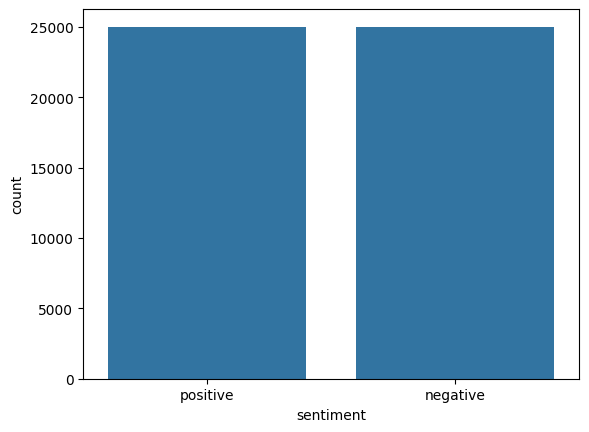

In [ ]:
# Let's observe distribution of positive/negative sentiments in dataset
import seaborn as sns
sns.countplot(x='sentiment',data=movie_reviews)

# Model Preprocessing

In [ ]:

movie_reviews["review"][2]
# the text contains punctuations,bracckets ,HTML tags and numbers
# we will preprocess this text int the next section

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''
# substituting the html tags with space
    return TAG_RE.sub('', text)

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
# Calling preprocessing_text function on movie_reviews

X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
# sample cleaned  up movie review
X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [ ]:
# converting sentiment labels to 0 & 1
y=movie_reviews['sentiment']
y=np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

In [ ]:
import numpy as np
import pandas as pd

# Assuming y_train is your target variable (e.g., binary labels 0 and 1)
class_distribution = np.bincount(y_train)  # Count occurrences of each class
total_samples = len(y_train)

# Calculate class percentages
class_percentages = (class_distribution / total_samples) * 100

# Display the results
for class_label, percentage in enumerate(class_percentages):
    print(f"Class {class_label}: {percentage:.2f}% of the dataset")

Class 0: 50.10% of the dataset
Class 1: 49.90% of the dataset


Prepare Embedding layer
Embedding layer converts our textual data into numeric form.It is used as the first layer of the data learning models in keras

In [ ]:
# embedding layer expects the words to be in numeric form
# using tokenizer function from keras.preprocessing.text library
# method fit_on_text trains the tokenizer
# method text_to_sequence converts sentences to their numeric form
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train=word_tokenizer.texts_to_sequences(X_train)
X_test=word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# adding 1 to store dimensions for words for which no pretrained word embeddinnds exsist
vocab_length=len(word_tokenizer.word_index) +1
vocab_length

92394

In [ ]:
# PAdding all reviews to fixed length 100
maxlen=100
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

In [ ]:

# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92394, 100)

# Model Training with

Model Training with Simple Neural Network

In [ ]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [ ]:

# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       9,239,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [ ]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6655 - loss: 0.6066 - val_acc: 0.7559 - val_loss: 0.5021
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8010 - loss: 0.4443 - val_acc: 0.7650 - val_loss: 0.4944
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8246 - loss: 0.4041 - val_acc: 0.7621 - val_loss: 0.5015
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8414 - loss: 0.3749 - val_acc: 0.7585 - val_loss: 0.5136
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8446 - loss: 0.3591 - val_acc: 0.7536 - val_loss: 0.5329
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8520 - loss: 0.3514 - val_acc: 0.7525 - val_loss: 0.5438


In [ ]:

# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7423 - loss: 0.5651


In [ ]:

# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5665546655654907
Test Accuracy: 0.7468000054359436


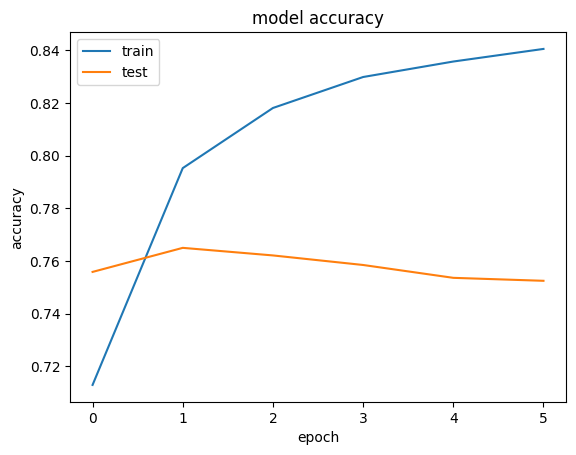

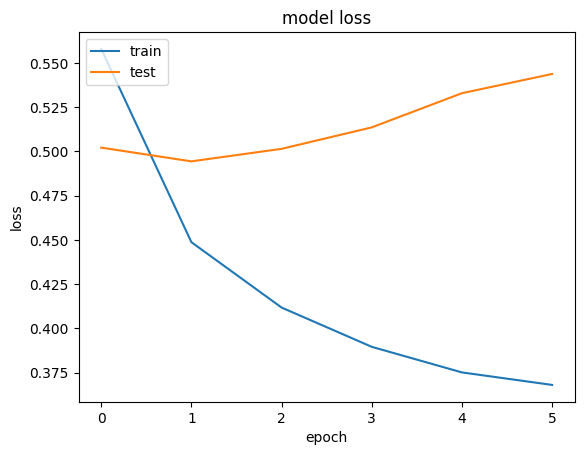

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Convolutional Neural Network

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], trainable=False)
cnn_model.add(embedding_layer)
from tensorflow.keras.layers import GlobalMaxPooling1D
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       9,239,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - acc: 0.6990 - loss: 0.5536 - val_acc: 0.8328 - val_loss: 0.3784
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - acc: 0.8595 - loss: 0.3387 - val_acc: 0.8413 - val_loss: 0.3571
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - acc: 0.8878 - loss: 0.2831 - val_acc: 0.8496 - val_loss: 0.3444
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - acc: 0.9160 - loss: 0.2351 - val_acc: 0.8533 - val_loss: 0.3338
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - acc: 0.9395 - loss: 0.1904 - val_acc: 0.8545 - val_loss: 0.3342
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - acc: 0.9607 - loss: 0.1495 - val_acc: 0.8546 - val_loss: 0.3460


In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8518 - loss: 0.3439


In [ ]:

# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3482545018196106
Test Accuracy: 0.8500999808311462


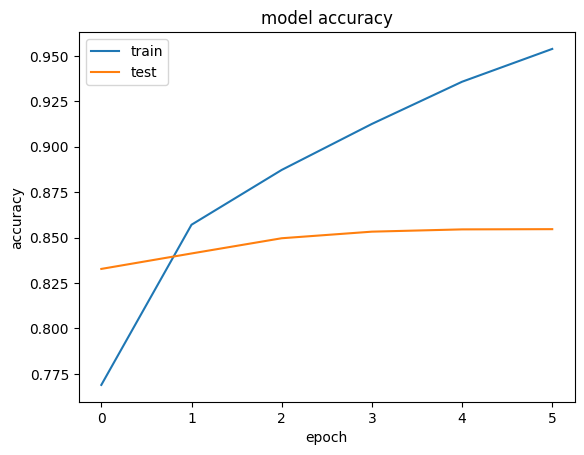

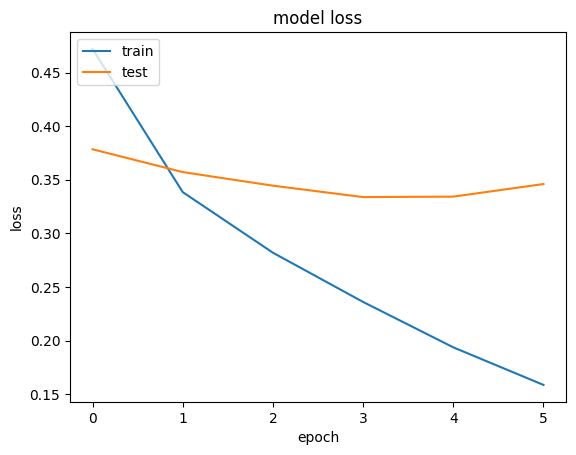

In [ ]:

# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Recurrent Neural Network(LSTM)

In [ ]:
from keras.layers import LSTM

In [ ]:

# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       9,239,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - acc: 0.6787 - loss: 0.5821 - val_acc: 0.8029 - val_loss: 0.4607
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 183ms/step - acc: 0.8136 - loss: 0.4255 - val_acc: 0.8354 - val_loss: 0.3727
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - acc: 0.8352 - loss: 0.3770 - val_acc: 0.8238 - val_loss: 0.3967
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - acc: 0.8553 - loss: 0.3381 - val_acc: 0.8499 - val_loss: 0.3356
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - acc: 0.8678 - loss: 0.3203 - val_acc: 0.8645 - val_loss: 0.3172
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - acc: 0.8716 - loss: 0.3089 - val_acc: 0.8650 - val_loss: 0.3151


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - acc: 0.8639 - loss: 0.3157


In [ ]:

# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3188190460205078
Test Accuracy: 0.8623999953269958


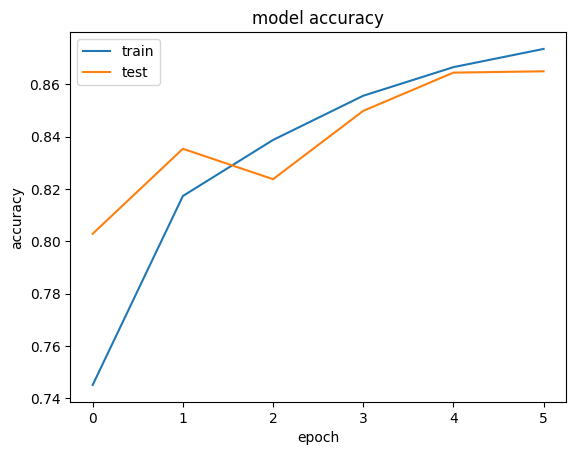

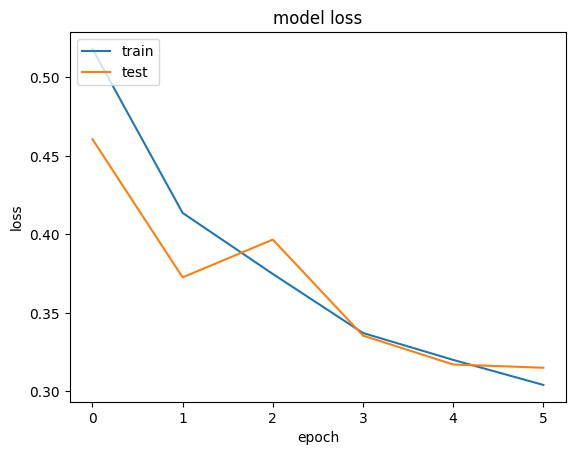

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model as a h5 file for possible use later

from keras.saving import save_model
save_model(lstm_model, f"./c1_lstm_model_acc_{round(score[1], 3)}.keras")

In [ ]:
pwd

'/content'

# Making Prediction on Live IMDb data

In [ ]:

# Load previously trained LSTM Model

from keras.models import load_model

model_path ='c1_lstm_model_acc_0.862.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (128, 100, 100)             │       9,239,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (128, 128)                  │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (128, 1)                    │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,356,779 (35.69 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 9,239,400 (35.25 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating

sample_reviews = pd.read_csv("/content/drive/MyDrive/c2_IMDb_Unseen_Predictions.csv")

sample_reviews.head(6)


,Unnamed: 0,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,8.8
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,3.1
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,2.8
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.7
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.4


In [ ]:

# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

In [ ]:

# Tokenising instance with earlier trained tokeniser
unseen_tokenized=word_tokenizer.texts_to_sequences(unseen_processed)
# Pooling instance to have  maxlength of 100 tokens
unseen_padded=pad_sequences(unseen_tokenized,padding='post',maxlen=maxlen)


In [ ]:
# passing tokenised instance to LSTM model ffor predictions
unseen_sentiment=lstm_model.predict(unseen_padded)
unseen_sentiment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([[0.77196056],
       [0.9780844 ],
       [0.19205429],
       [0.5331678 ],
       [0.93159574],
       [0.02627849]], dtype=float32)

In [ ]:
# Writing model output file back to Google Drive

sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiment*10,1)

df_prediction_sentiments = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(sample_reviews['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(sample_reviews['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(sample_reviews['IMDb Rating'], columns = ['IMDb Rating'])


dfx=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

dfx.to_csv("c2_IMDb_Unseen_Predictions.csv", sep=',', encoding='UTF-8')

dfx.head(6)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,7.7
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.8
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,1.9
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,5.3
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.3
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.3


In [ ]:

unseen_sentiment

array([[0.77196056],
       [0.9780844 ],
       [0.19205429],
       [0.5331678 ],
       [0.93159574],
       [0.02627849]], dtype=float32)

In [ ]:

unseen_sentiment[0][0]

0.77196056

In [ ]:
prediction_text= f"Positive Review with probable IMDb rating as: {np.round(unseen_sentiment[0][0]*10,1)}"

In [ ]:
prediction_text

'Positive Review with probable IMDb rating as: 7.7'